In [1]:
import torch
from PIL import Image
from torchvision import transforms
import urllib
import numpy as np
from matplotlib import pyplot as plt

import PIL
from PIL import Image 

import imagenet_stubs
from imagenet_stubs.imagenet_2012_labels import label_to_name

import seaborn as sns
sns.set_theme(style="whitegrid")

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
%%capture
vgg16 = torch.hub.load('pytorch/vision:v0.6.0', 'vgg16', pretrained=True)
resenet50 = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
resenet152 = torch.hub.load('pytorch/vision:v0.6.0', 'resnet152', pretrained=True)
squeezenet = torch.hub.load('pytorch/vision:v0.6.0', 'squeezenet1_0', pretrained=True)

models = [vgg16, resenet50, resenet152, squeezenet]
[model.to(device).eval()  for model in models]

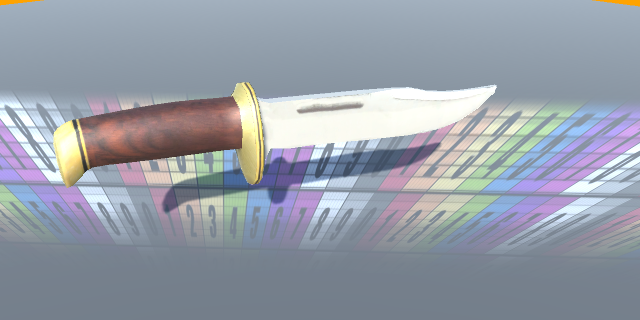

In [63]:
pil_img = Image.open('samples/lighting/sample_1104.png')
pil_img

In [64]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(pil_img.convert('RGB')).to(device)
input_batch = input_tensor.unsqueeze(0) # A mini-batch

In [65]:
with torch.no_grad():
  output = models[2](input_batch)
  logits = torch.nn.functional.softmax(output[0], dim=0)

  # bar plot top 5 classes
  names_of = [label_to_name(int(x)) for x in  logits.topk(5).indices.cpu().numpy()]
  percents = logits.topk(5).values.cpu().numpy()
  
  for x,y in zip(names_of, percents):
    print(f"{x}: {y*100}")

binder, ring-binder: 17.70046055316925
fountain pen: 10.760271549224854
shower curtain: 4.759448394179344
wallet, billfold, notecase, pocketbook: 2.9237069189548492
iron, smoothing iron: 2.7498146519064903


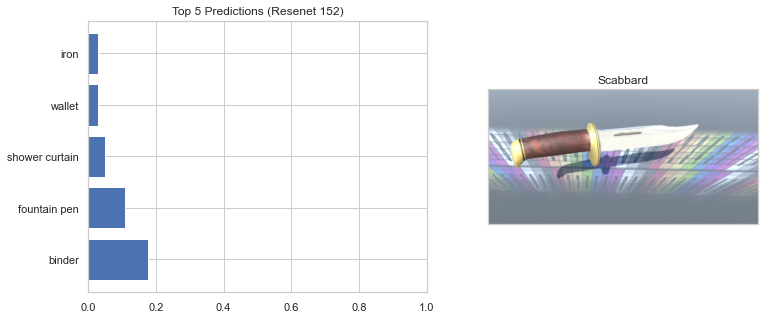

In [70]:
axfiges, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [5, 4]})
axes[0].barh([n.split(',')[0] for n in names_of], percents)
axes[0].axis(xmin=0.0, xmax=1.0)
axes[0].title.set_text('Top 5 Predictions (Resenet 152)')
axes[1].imshow(pil_img)
axes[1].grid(None)
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])
axes[1].title.set_text('Scabbard')

plt.show()

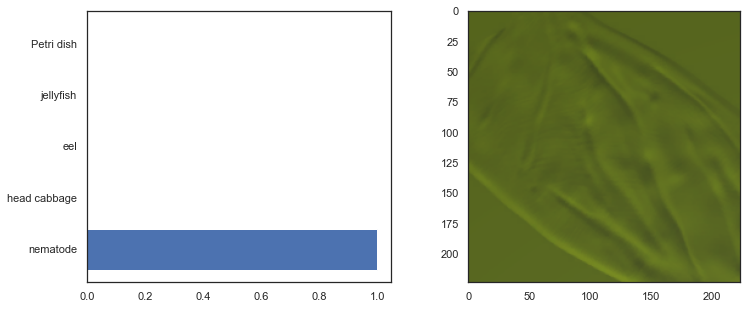

In [10]:
with sns.axes_style("white"):
  axfiges, axes = plt.subplots(1, 2, figsize=(12, 5))
  axes[0].barh([n.split(',')[0] for n in names_of], percents)
  axes[1].imshow(pil_img)

In [62]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [50]:
with torch.no_grad():
  outputs = [model(input_batch) for model in models]
  all_logits = [torch.nn.functional.softmax(O[0], dim=0) for O in outputs]

  names_of = [[label_to_name(int(x)) for x in logits.topk(5).indices.cpu().numpy()]  for logits in all_logits]
  percents = [logits.topk(5).values.cpu().numpy() for logits in all_logits]

In [49]:
names_of

[['head cabbage',
  'vine snake',
  "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",
  'lacewing, lacewing fly',
  'green mamba'],
 ['nematode, nematode worm, roundworm',
  'head cabbage',
  'velvet',
  'Petri dish',
  'beaker'],
 ['nematode, nematode worm, roundworm',
  'head cabbage',
  'eel',
  'jellyfish',
  'Petri dish'],
 ['tree frog, tree-frog',
  'head cabbage',
  "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",
  'harvestman, daddy longlegs, Phalangium opilio',
  'custard apple']]